In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\uk455\\Desktop\\Final project 2\\project 2\\BankChurners.csv")

In [3]:
df.sample()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
4178,719609433,Existing Customer,55,F,4,Uneducated,Divorced,$40K - $60K,Blue,43,...,3,2,1965.0,1525,440.0,0.855,4671,69,0.816,0.776


In [4]:
df.shape

(10127, 21)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [7]:
df["Card_Category"].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [8]:
#checking datatypes
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [115]:
#age groups
bins = [0,30,40,50,60,100]
labels= ["<30","30-40","40-50","50-60","60+"]
df["Age_Group"] = pd.cut(df["Customer_Age"],bins=bins,labels=labels)


In [120]:
#customer tenure
bins = [0, 12, 24, 36, 48, 60]
labels = ['<1yr', '1-2yr', '2-3yr', '3-4yr', '4-5yr']
df['Tenure_Group'] = pd.cut(df['Months_on_book'], bins=bins, labels=labels)


In [144]:
df["Trans_Amt_per_Contact"] = df['Total_Trans_Amt'] / (df['Contacts_Count_12_mon'] + 1)
df['Revolving_Bal_Ratio'] = df['Total_Revolving_Bal'] / (df['Credit_Limit'] + 1)
df['Open_Credit_Percent'] = df['Avg_Open_To_Buy'] / (df['Credit_Limit'] + 1)

In [143]:
import numpy as np
df["Utilization_Flag"] = np.where(
    df["Avg_Utilization_Ratio"] > 0.8 , 'High',
    np.where(df["Avg_Utilization_Ratio"]>0.5,'Mid','Low')
)


In [170]:
# Custom bins
df['Trans_Count_Category'] = pd.cut(
    df['Total_Trans_Ct'],
    bins=[0, 25, 50, 75, 100, float('inf')],  # inf handles future growth
    labels=['Very Low (≤25)', 'Low (26-50)', 'Medium (51-75)', 
            'High (76-100)', 'Very High (>100)'],
    include_lowest=True
)

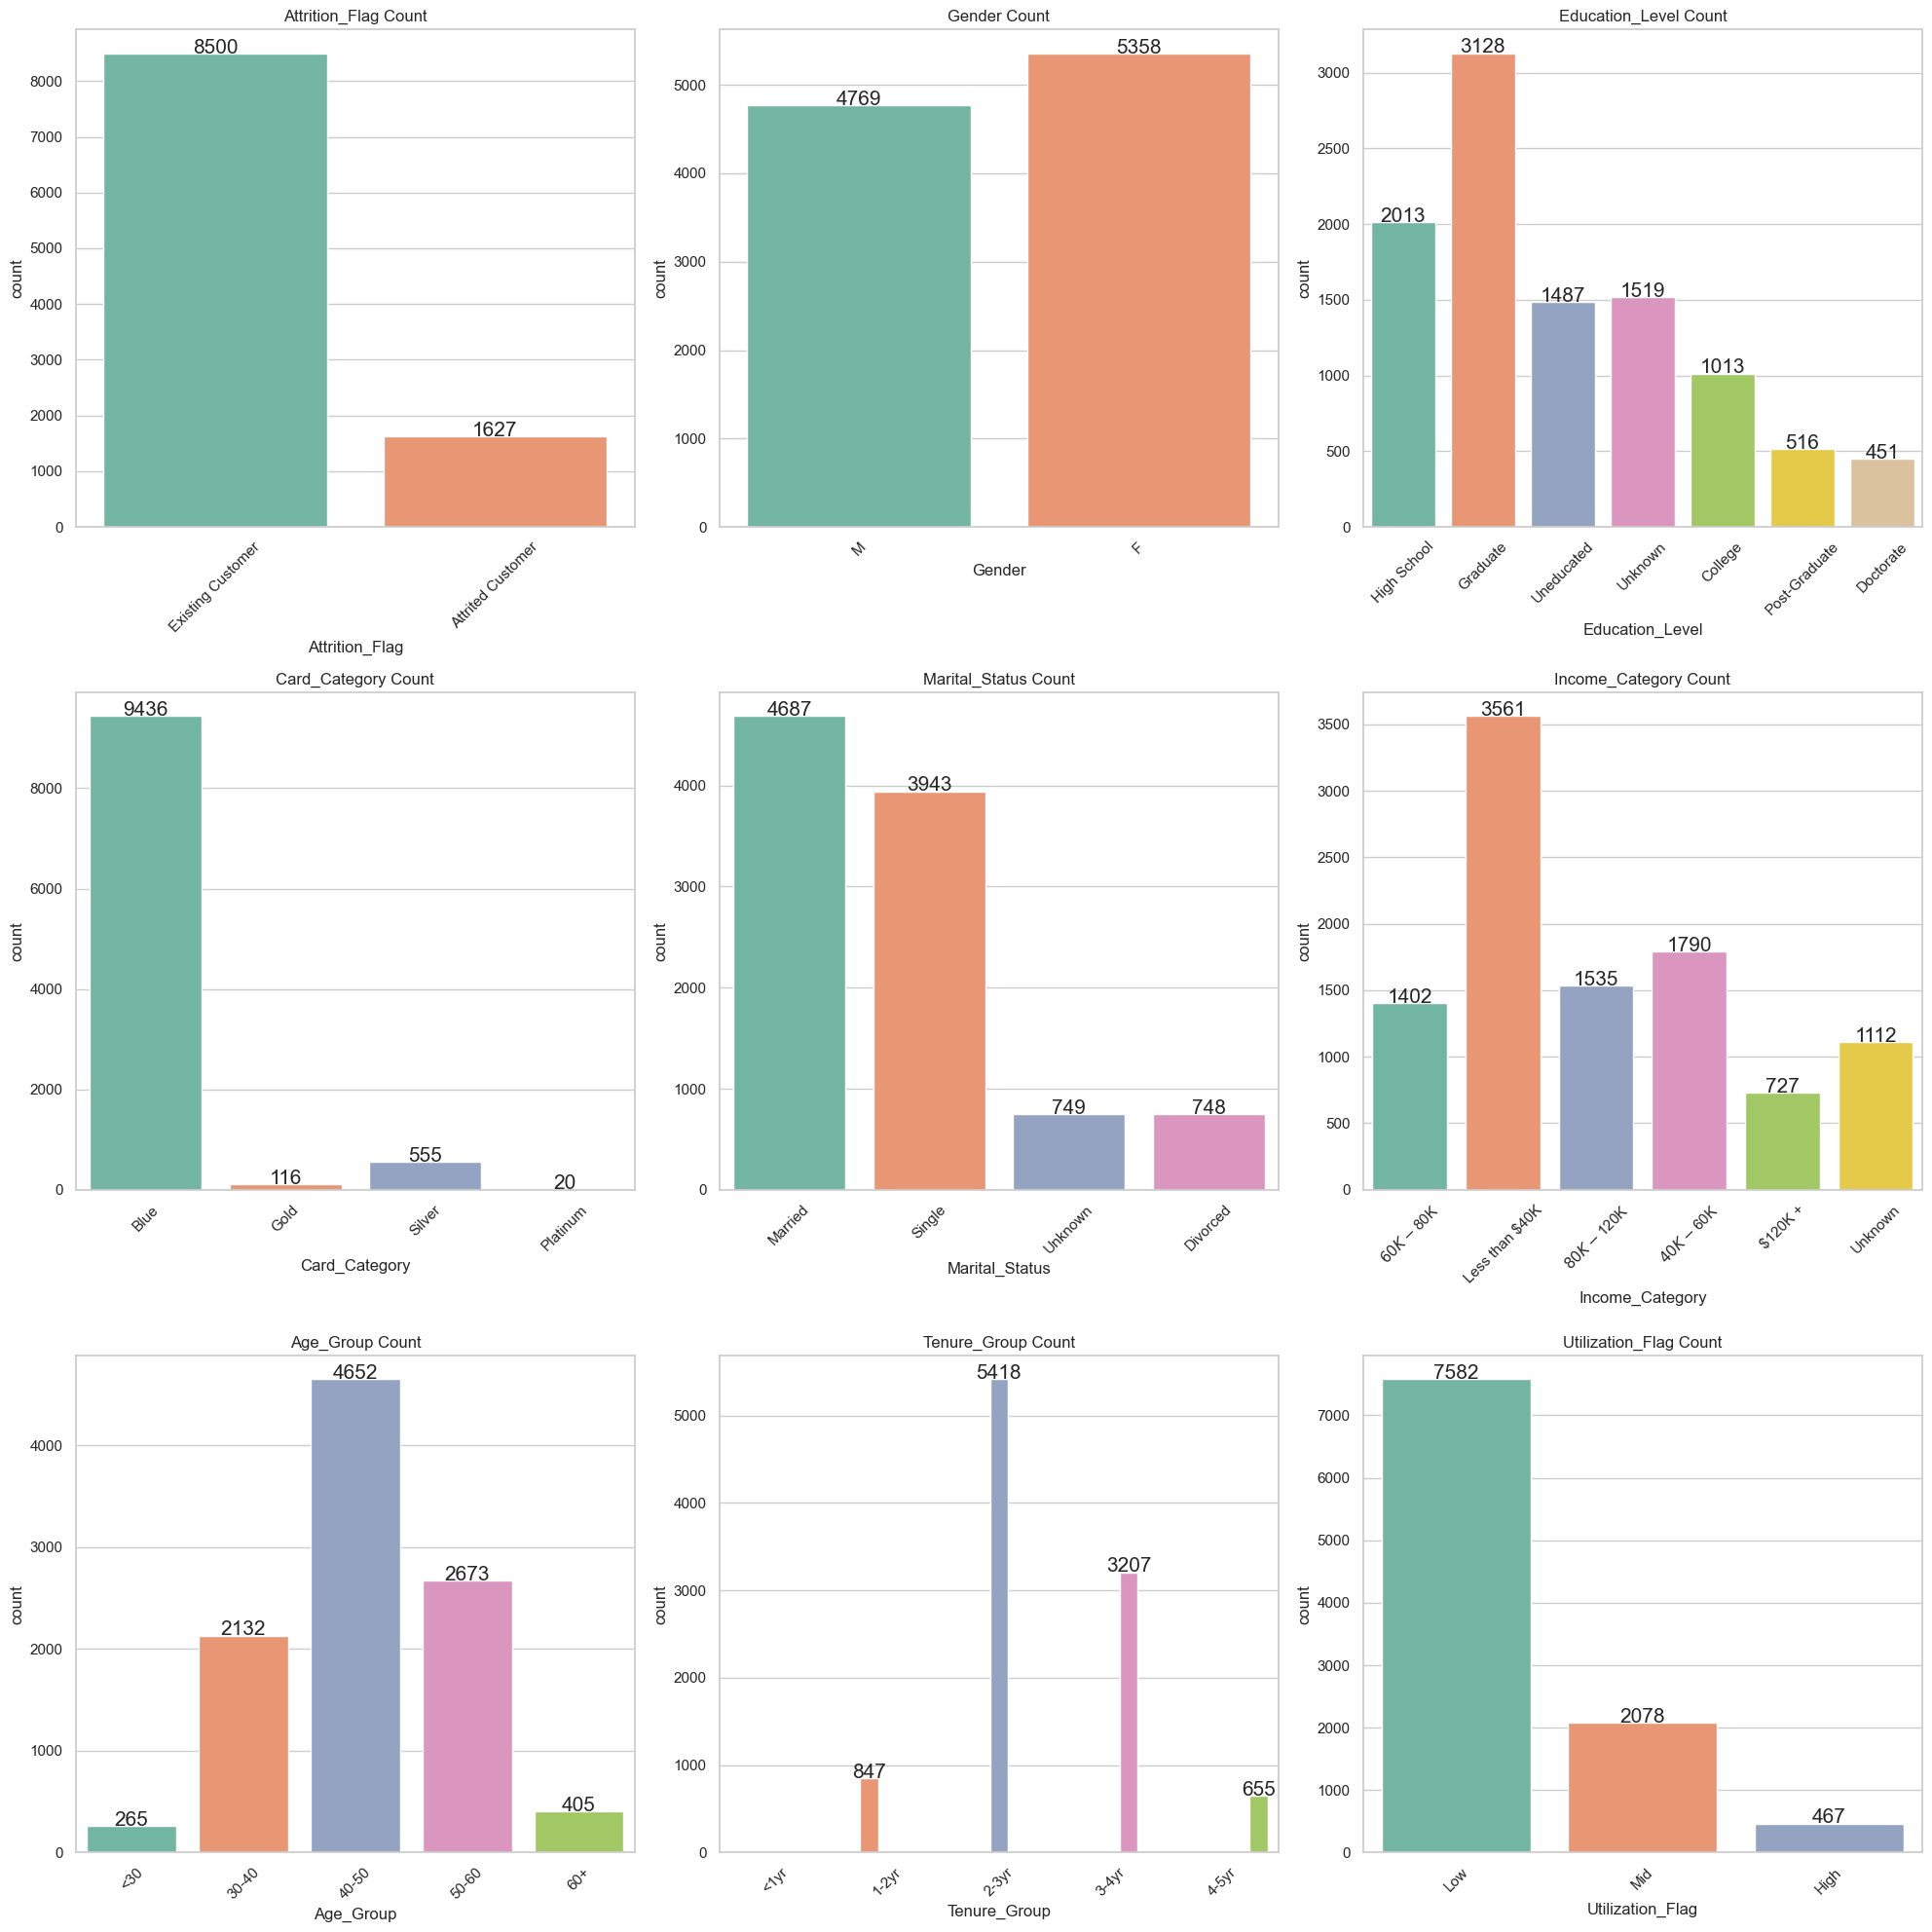

In [148]:
#count of customer by cetegorical variables
# Set the visual style
sns.set(style="whitegrid")

# Columns to plot
cat_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Card_Category', 
            'Marital_Status', 'Income_Category',"Age_Group",
            "Tenure_Group","Utilization_Flag"]

# Subplot layout
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    # Plot with hue=col for colorful bars (each category colored)
    sns.countplot(data=df, x=col, hue=col, legend=False, palette='Set2', ax=ax)
    ax.set_title(f'{col} Count')
    ax.tick_params(axis='x', rotation=45)

    # Add data labels
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(p.get_x() + p.get_width() / 2., height + 2,
                    int(height), ha="center", fontsize=15)

# Remove extra axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




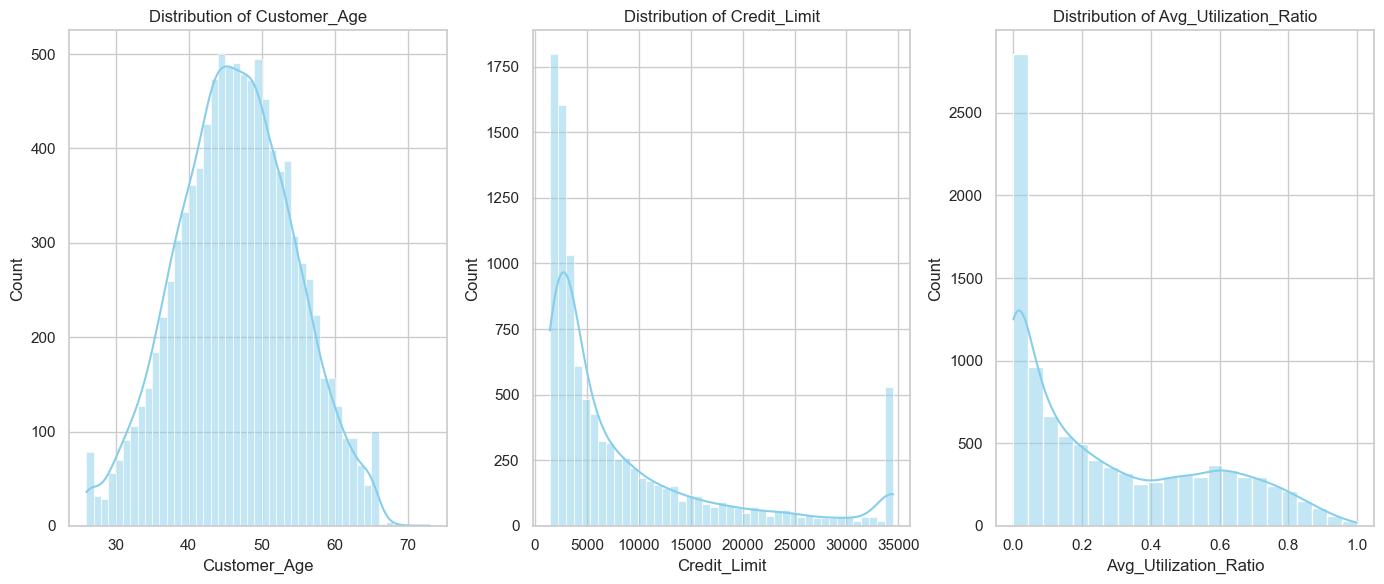

In [124]:
#data distributions plots

# Set Seaborn theme
sns.set(style="whitegrid")

# Numerical columns to plot
num_cols = ['Customer_Age', 'Credit_Limit', 'Avg_Utilization_Ratio']

# Subplot layout
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6))
axes = axes.flatten()

# Plot each distribution
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(col)

# Remove unused subplot slots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [15]:
df.describe().round(2)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,7.391776e+08,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27
std,3.690378e+07,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28
min,7.080821e+08,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00
25%,7.130368e+08,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02
50%,7.179264e+08,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18
75%,7.731435e+08,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50
max,8.283431e+08,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00


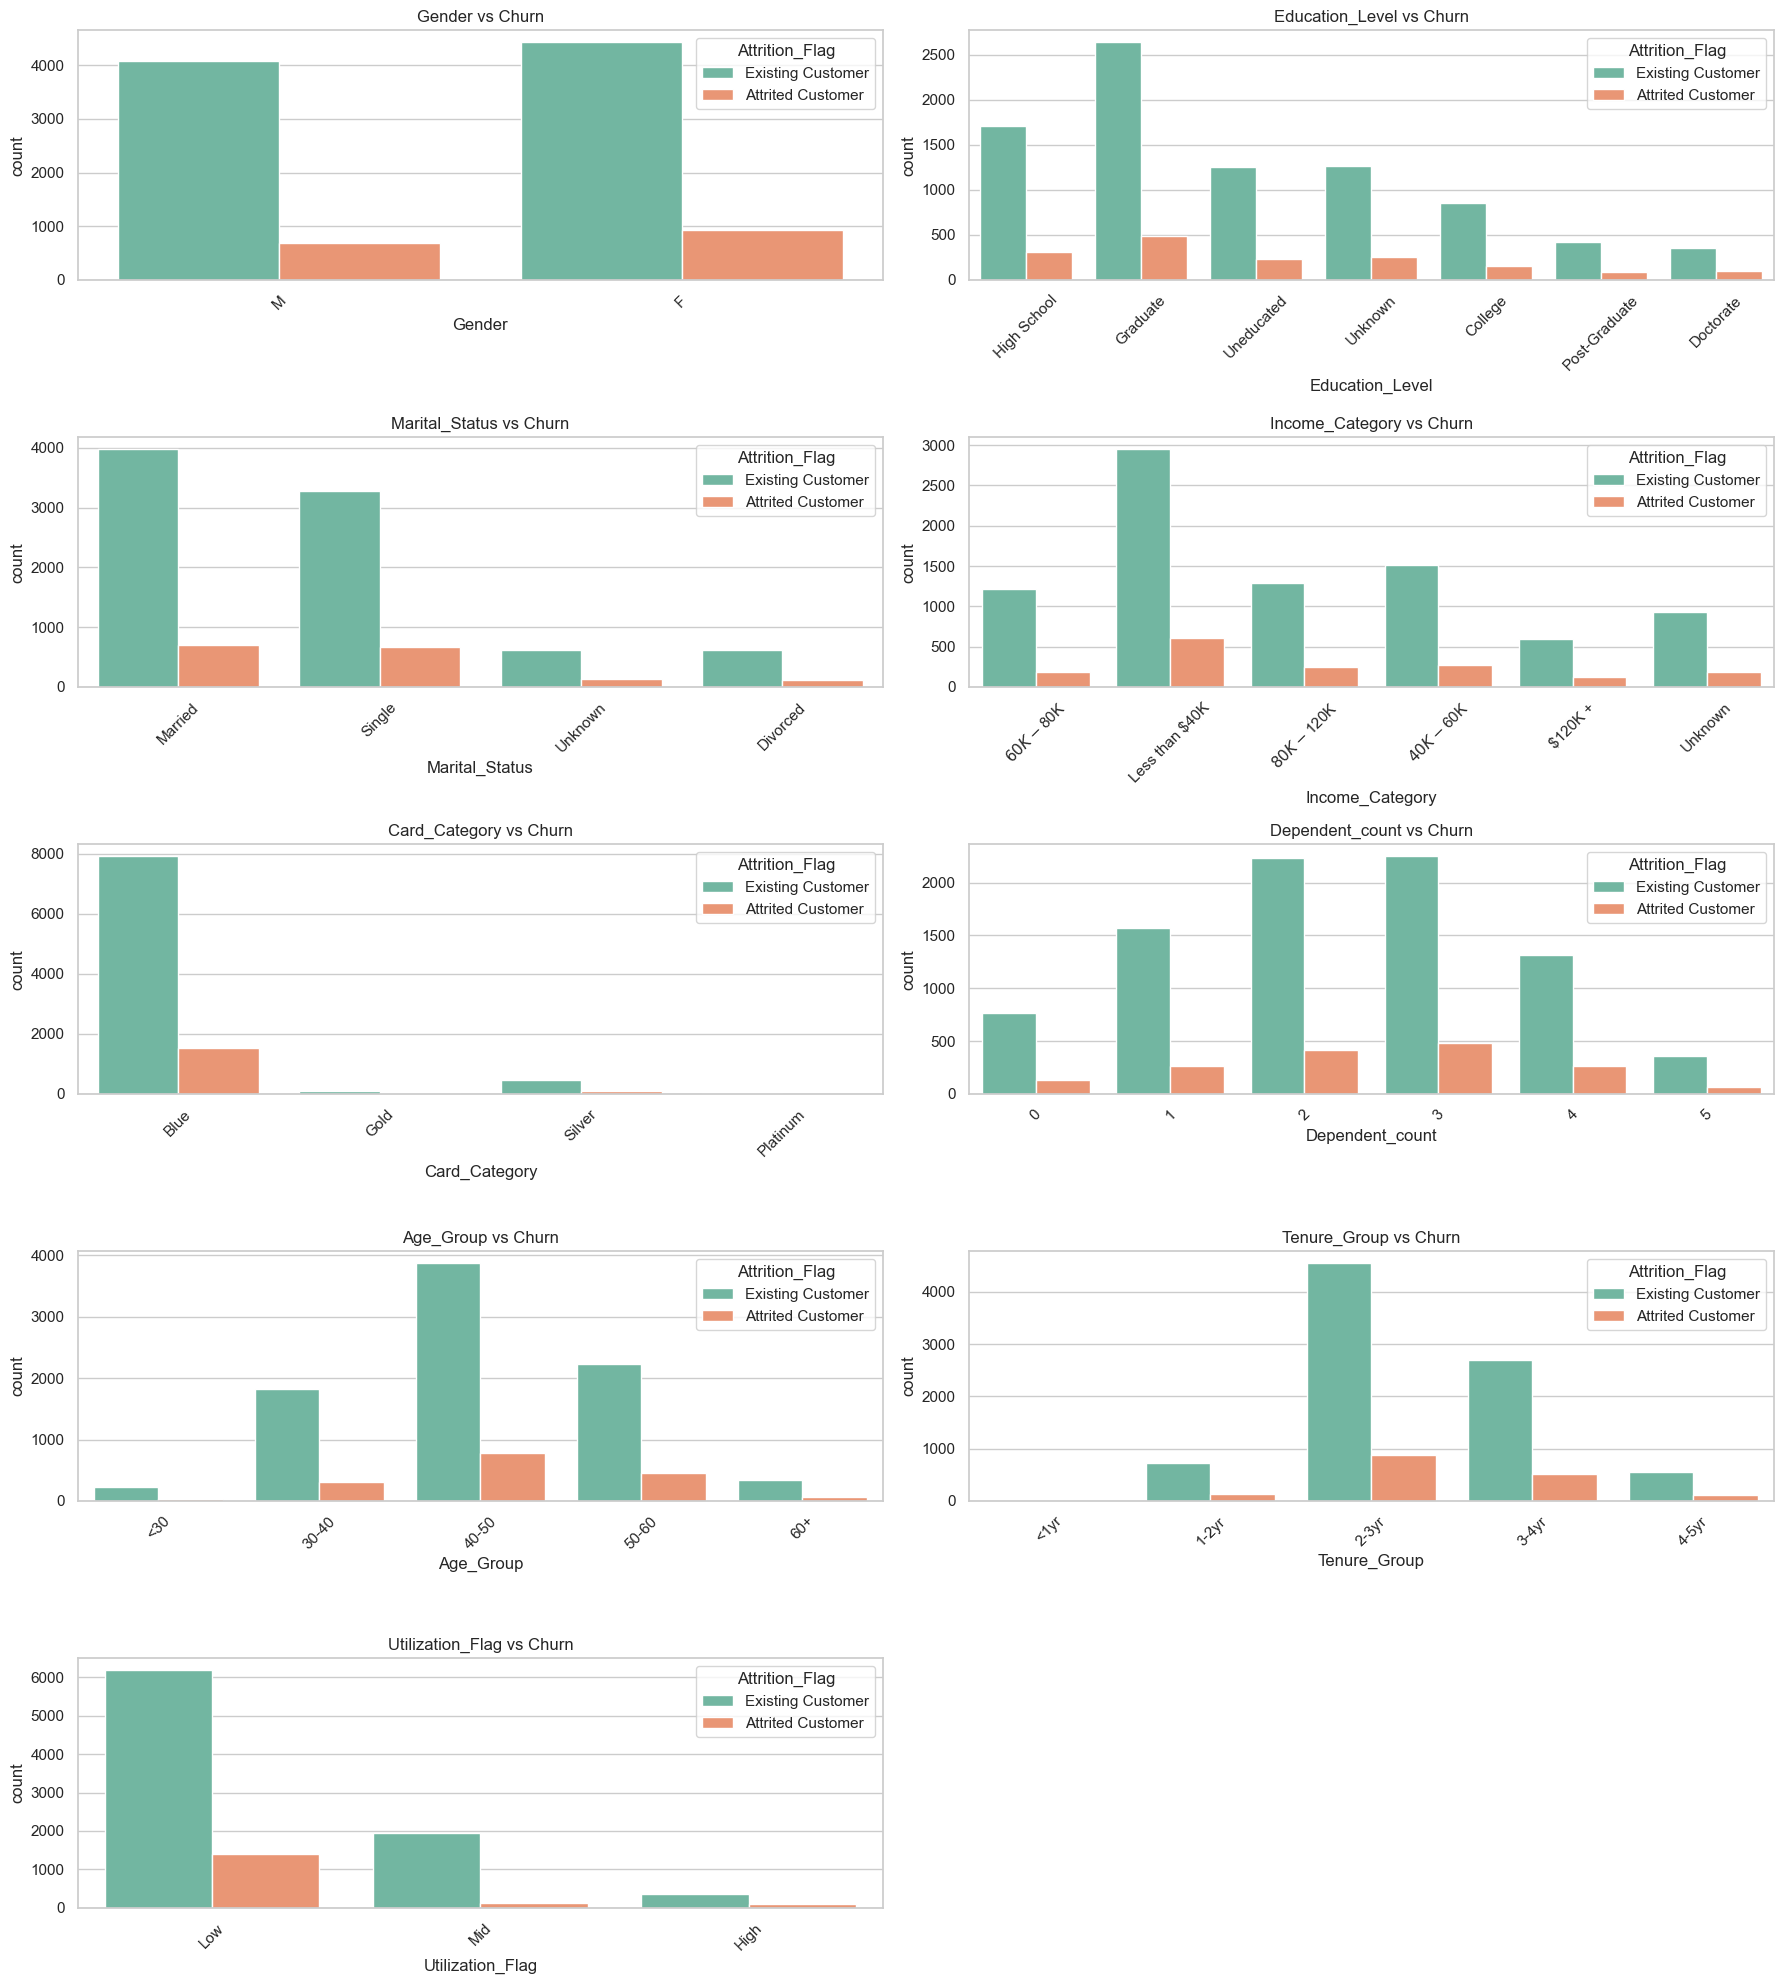

In [149]:
#attrition vs variables count
cat_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Dependent_count','Age_Group','Tenure_Group','Utilization_Flag']

n_cols = 2
n_rows = (len(cat_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 20))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue='Attrition_Flag', palette='Set2', ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()


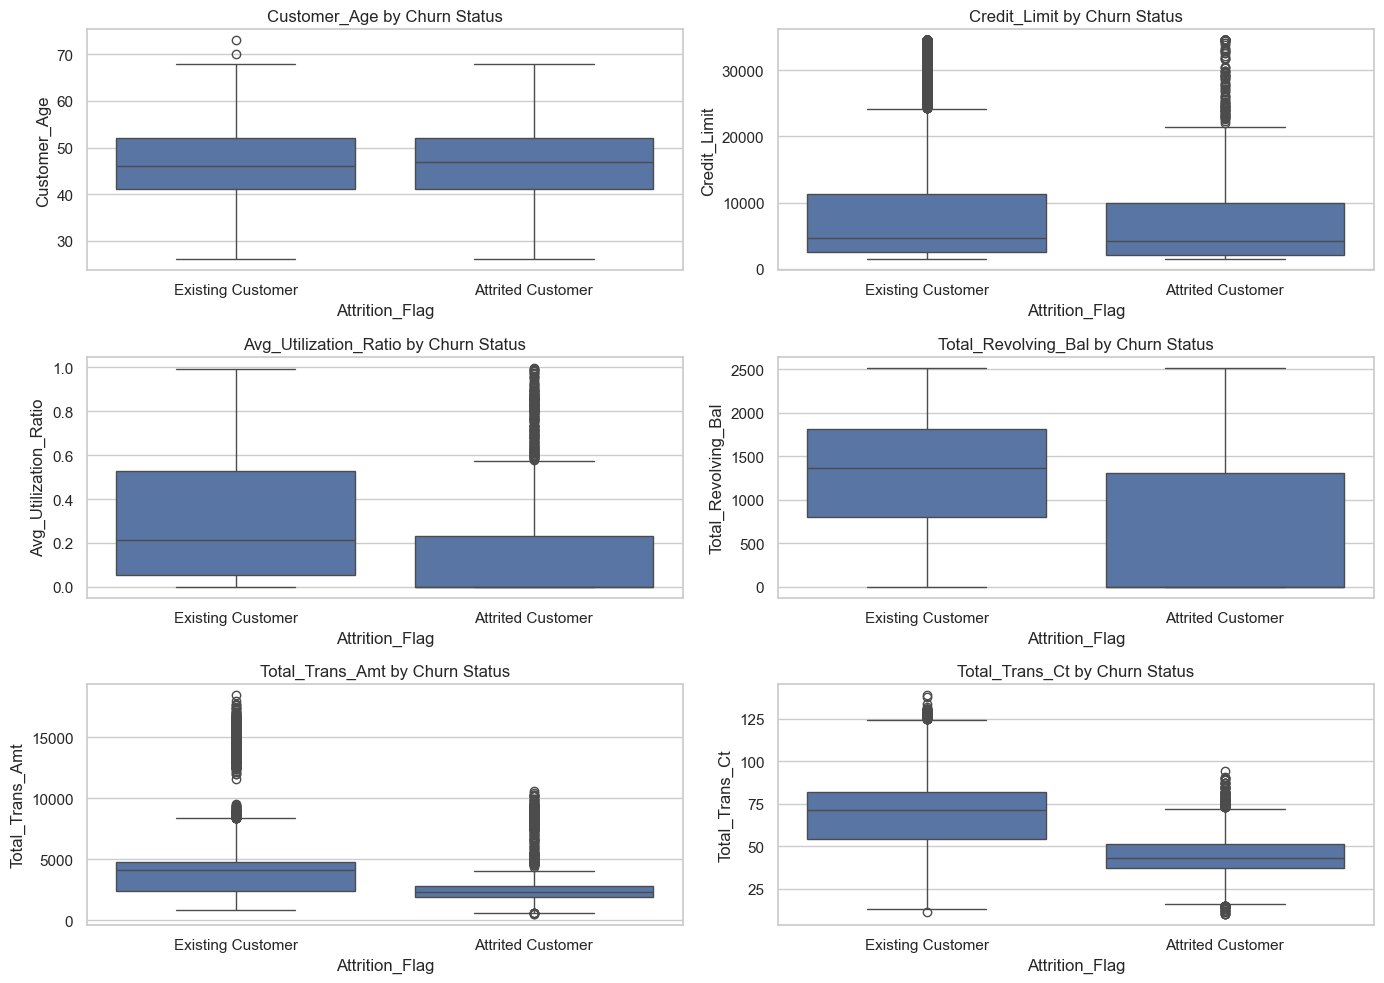

In [51]:

num_cols = ['Customer_Age', 'Credit_Limit', 'Avg_Utilization_Ratio', 
            'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct']

n_cols = 2
n_rows = (len(num_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x='Attrition_Flag', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Churn Status')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


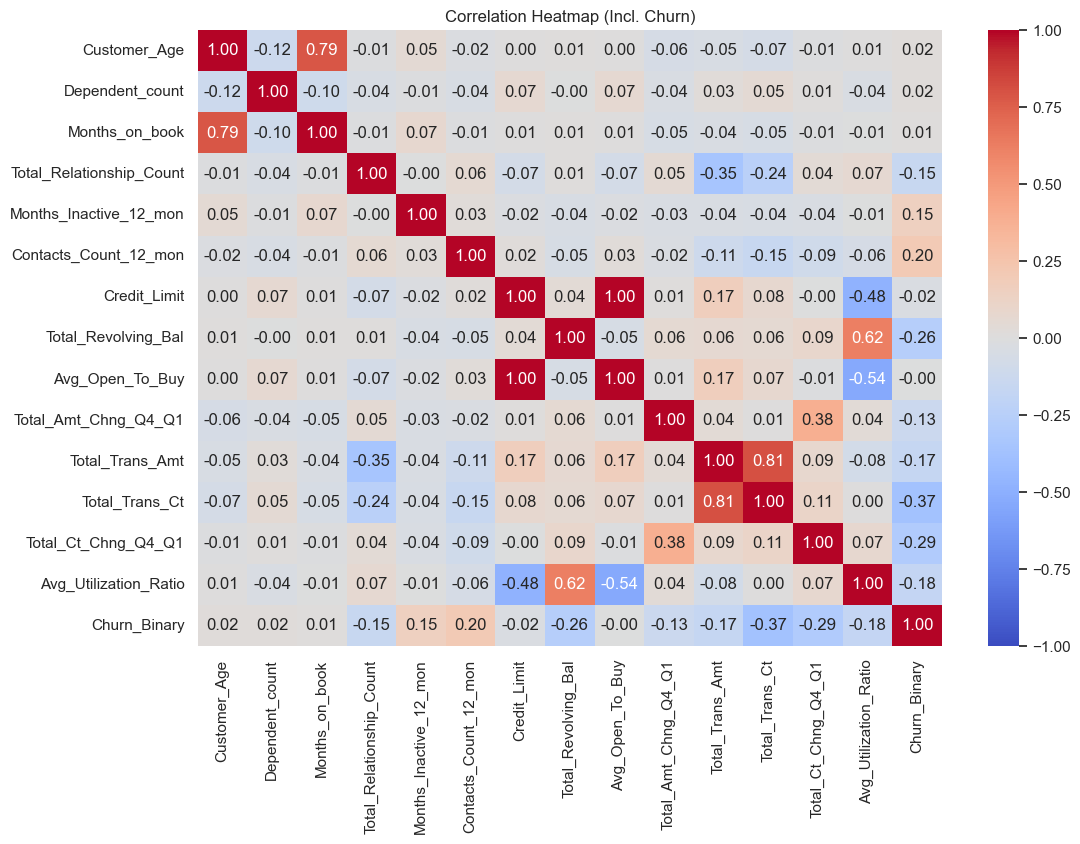

In [56]:
# Convert Attrition_Flag to binary if not already
df['Churn_Binary'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Select only numeric columns
numeric = df.select_dtypes(include='number').drop(columns=["CLIENTNUM"])

# Compute correlation
corr = numeric.corr()

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Incl. Churn)")
plt.show()


posx and posy should be finite values
posx and posy should be finite values


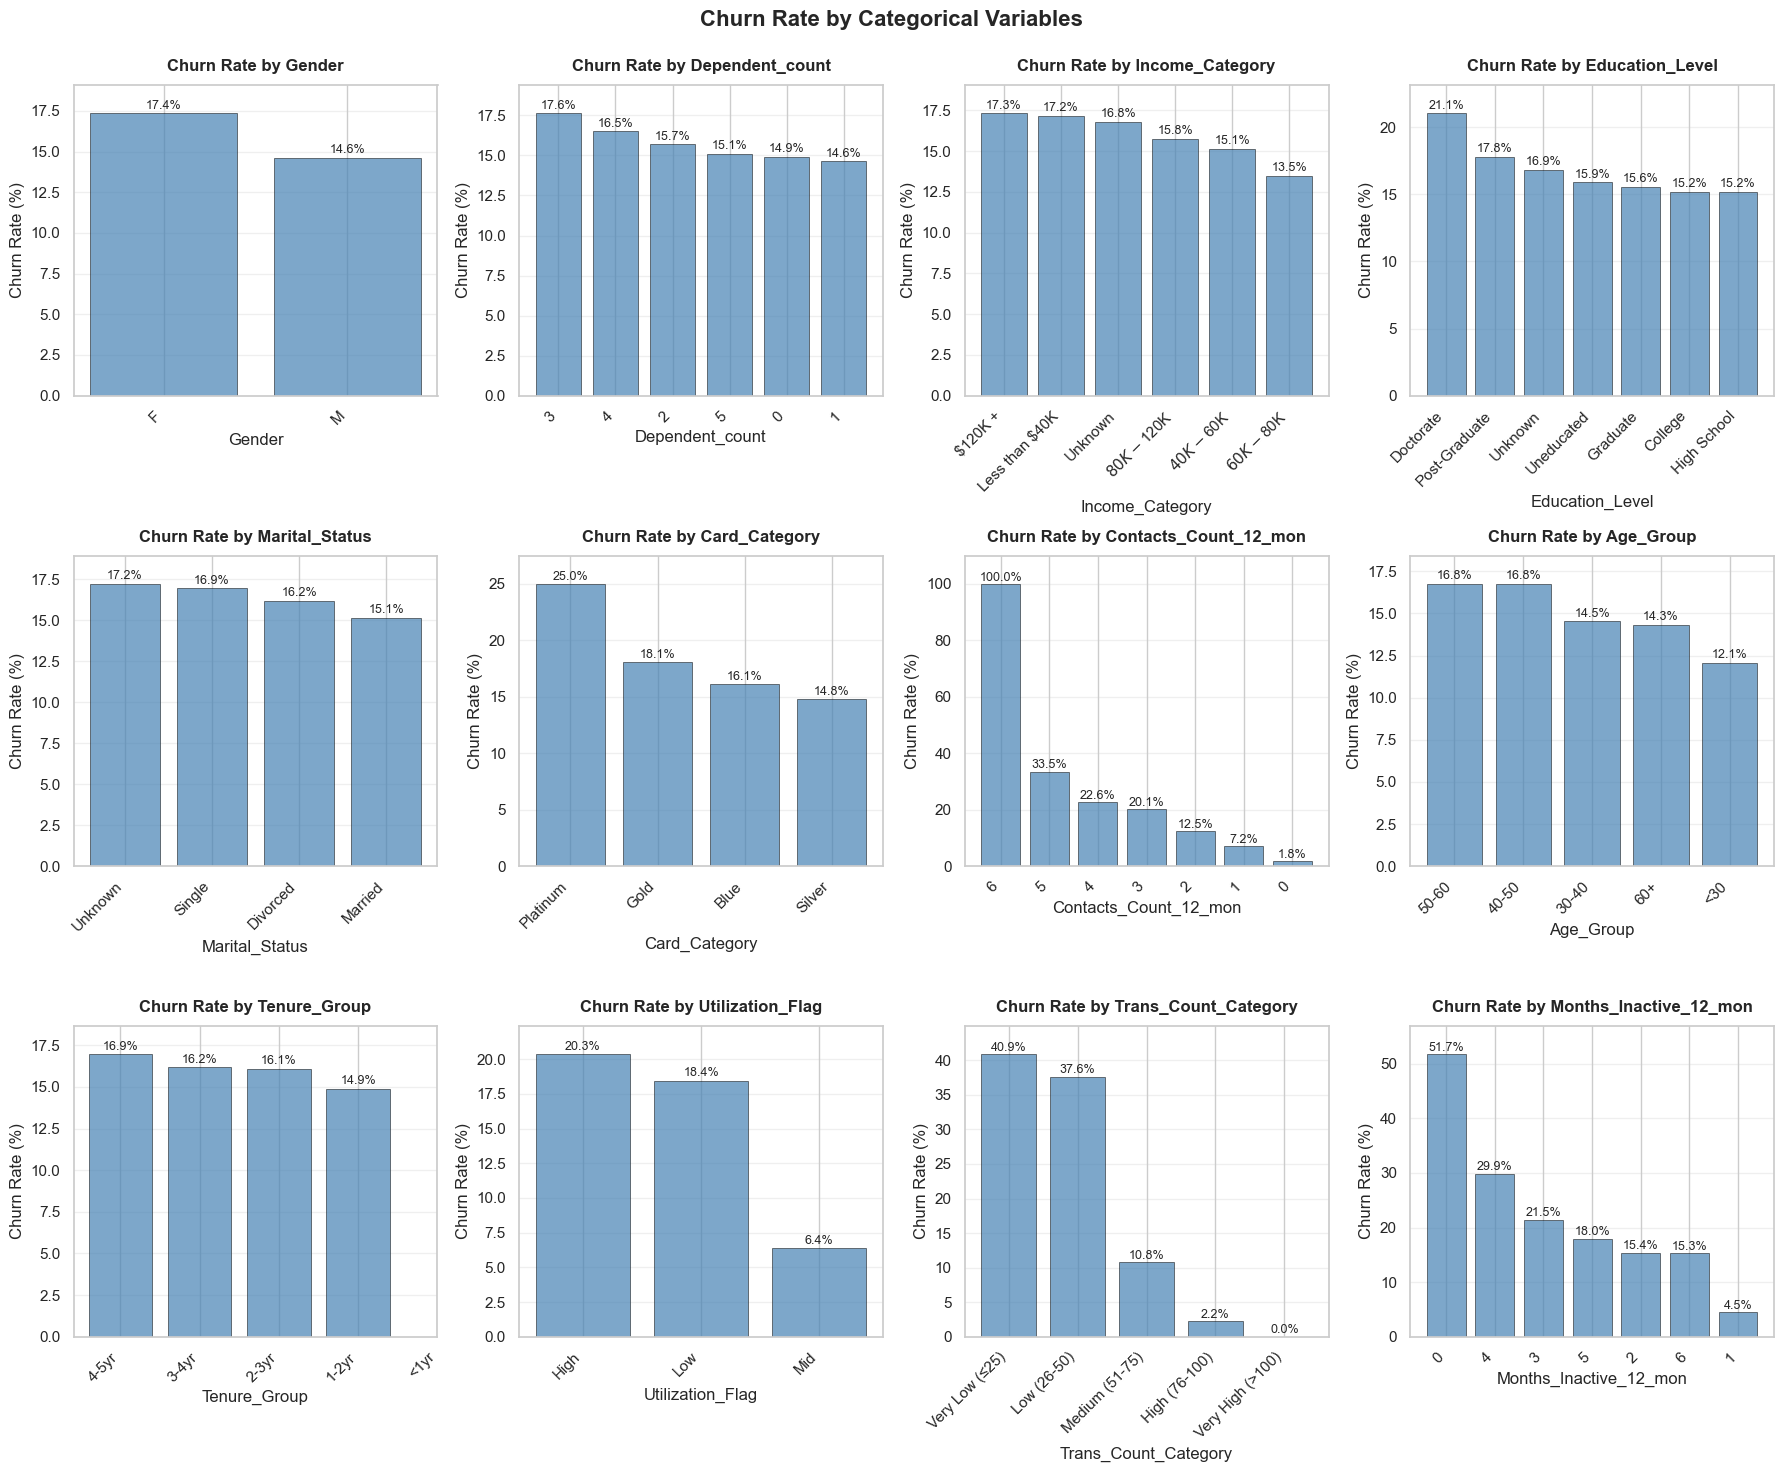

In [179]:
#churn rate by categorical columns
def churn_rate_by_col(df, colname):
    result = df.groupby(colname, observed=False)["Churn_Binary"].mean().reset_index()
    result["Churn_Rate"] = (result["Churn_Binary"]*100).round(2)
    result = result.sort_values(by="Churn_Rate", ascending=False)
    return result[[colname,'Churn_Rate']]

# List of categorical columns to analyze
categorical_cols = ["Gender", "Dependent_count", "Income_Category", 
                   "Education_Level", "Marital_Status", "Card_Category", 
                   "Contacts_Count_12_mon","Age_Group","Tenure_Group",
                    "Utilization_Flag","Trans_Count_Category","Months_Inactive_12_mon"]

# Set up the subplot grid
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 15))
fig.suptitle('Churn Rate by Categorical Variables', fontsize=16, fontweight='bold')

# Flatten axes for easier iteration
axes = axes.flatten()

# Create bar plots for each categorical column
for i, col in enumerate(categorical_cols):
    # Get churn rate data
    data = churn_rate_by_col(df, col)
    
    # Create bar plot
    bars = axes[i].bar(range(len(data)), data['Churn_Rate'], 
                      color='steelblue', alpha=0.7, edgecolor='black', linewidth=0.5)
    
    # Customize the subplot
    axes[i].set_title(f'Churn Rate by {col}', fontweight='bold', pad=10)
    axes[i].set_ylabel('Churn Rate (%)')
    axes[i].set_xlabel(col)
    
    # Set x-axis labels
    axes[i].set_xticks(range(len(data)))
    axes[i].set_xticklabels(data[col], rotation=45, ha='right')
    
    # Add value labels on bars
    for j, bar in enumerate(bars):
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{height:.1f}%', ha='center', va='bottom', fontsize=9)
    
    # Set y-axis to start from 0
    axes[i].set_ylim(0, max(data['Churn_Rate']) * 1.1)
    
    # Add grid for better readability
    axes[i].grid(axis='y', alpha=0.3)

# Remove empty subplots (we have 7 plots in a 3x3 grid)
for i in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.93)  # Make room for main title
plt.show()

In [154]:

df.groupby('Churn_Binary')[['Contacts_Count_12_mon', 'Total_Trans_Ct', 'Months_Inactive_12_mon']].mean()


,Contacts_Count_12_mon,Total_Trans_Ct,Months_Inactive_12_mon
Churn_Binary,,,
0,2.356353,68.672588,2.273765
1,2.972342,44.933620,2.693301


In [159]:
correlations = df.corr(numeric_only=True).drop(columns=["CLIENTNUM"])['Churn_Binary'].sort_values(ascending=False)
print(correlations)
# we can see there is not much a relation between top 4 variable below but still they contributed to churn, higher the number, 
#higher percentage of customer leaving

Churn_Binary                1.000000
Contacts_Count_12_mon       0.204491
Open_Credit_Percent         0.178318
Months_Inactive_12_mon      0.152449
Dependent_count             0.018991
Customer_Age                0.018203
Months_on_book              0.013687
Avg_Open_To_Buy            -0.000285
Credit_Limit               -0.023873
CLIENTNUM                  -0.046430
Total_Amt_Chng_Q4_Q1       -0.131063
Total_Relationship_Count   -0.150005
Total_Trans_Amt            -0.168598
Avg_Utilization_Ratio      -0.178410
Revolving_Bal_Ratio        -0.178424
Trans_Amt_per_Contact      -0.198928
Total_Revolving_Bal        -0.263053
Total_Ct_Chng_Q4_Q1        -0.290054
Total_Trans_Ct             -0.371403
Name: Churn_Binary, dtype: float64


In [161]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Use numeric behavior features
features = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct',
            'Avg_Utilization_Ratio', 'Contacts_Count_12_mon', 'Months_Inactive_12_mon']

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [162]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [164]:
cluster_summary = df.groupby('Cluster')[features + ['Churn_Binary']].mean().round(2)
print(cluster_summary)


         Customer_Age  Credit_Limit  Total_Trans_Amt  Total_Trans_Ct  \
Cluster                                                                
0               45.43       7894.85          4240.80           70.37   
1               45.31      16863.17         13099.05          105.38   
2               47.35      12672.14          2582.01           48.21   
3               46.46       2699.07          3600.95           63.44   

         Avg_Utilization_Ratio  Contacts_Count_12_mon  Months_Inactive_12_mon  \
Cluster                                                                         
0                         0.12                   1.76                    2.11   
1                         0.15                   2.23                    2.20   
2                         0.09                   3.21                    2.57   
3                         0.63                   2.42                    2.38   

         Churn_Binary  
Cluster                
0                0.09  
1       

## Final Findings & Business Recommendations

### Objective:
Analyze customer churn to identify key drivers and provide actionable strategies for improving customer retention.

---

### Key Insights:

- Customers with **low transaction count (< 50)** and **inactivity of 0, 3, or 4 months** had higher churn rates.
- **Platinum and Gold** card holders showed significantly higher churn than **Silver and Blue** users.
- Surprisingly, customers with **higher education levels** churned more than those with lower qualifications.
- Customers earning **< $40K** and **> $120K** showed the **highest churn rates**.
- **Higher utilization ratio** is directly correlated with increased churn.
- The **40–60 age group** experienced more churn than other age bands.
- Customers with **longer tenure** and **higher contact frequency** were more likely to churn — indicating potential dissatisfaction despite engagement.
- **Single, Divorced, and Unknown** marital status customers had higher churn compared to **Married** customers.

---

### Business Recommendations:

- **Increase engagement campaigns** for low-transaction customers and **Platinum/Gold card holders** (e.g., cashback, discounts).
- **Reward loyalty** — provide perks for **long-tenured and high-transaction customers**.
- Consider reducing **annual charges and interest rates** for **low-income customers** to improve retention.
- Collect and analyze **feedback from churned customers** to identify unresolved pain points.
- Improve support response time — **resolve issues proactively** to retain high-risk users.

---

### 📂 Project Summary:

- Cleaned and analyzed **10,000+ records**
- Built insightful visualizations with **Seaborn & Matplotlib**
- Performed **feature engineering** (age groups, transaction ratios, churn drivers)
- Delivered actionable business insights without the need for a dashboard
